## 住宅価格の予測

2.住宅価格の回帰

Week3で使用したアイオワ州エイムズ市の住宅価格データセットを使い、回帰問題を解く練習をします。


79種類の特徴量（説明変数）を活用し、住宅価格の数値を推測する問題が設定できます。

こういった**連続値のものを推測する問題を回帰問題**と呼びます。


House Prices: Advanced Regression Techniques


今回使う手法の一覧

scikit-laernを使い以下の手法で学習と推定を行っていきます。

それぞれの手法についての詳細は今の段階では扱いません。

ライブラリを使えばどれも気軽に利用できることや、手法毎の結果に違いがあることを簡単に見ていきます。


**1. 線形回帰**

**2. SVM**

**3. 決定木**

**4. ランダムフォレスト**

分類問題と回帰問題の両方で使える手法と、そうではない手法が存在します。



3.データセットの準備

Week3同様にKaggleからデータセットをダウンロードしてください。train.csvのみを使用します。


House Prices: Advanced Regression Techniques | Kaggle


4.回帰問題の流れ

回帰問題の流れは分類問題と基本的には同じですから、課題1のように細かい説明は行いません。


練習のための準備
このデータセットには79種類の特徴量（目的変数）がありますが、Week3で探索して分かったようにさまざまなタイプのデータが含まれています。これをどう前処理するかということは機械学習において重要な箇所ですが、今回は回帰問題の学習や評価の練習を優先するため、説明変数(特徴量)GrLivAreaとYearBuiltの2つだけを利用することにします。

## 【問題1】練習のために特徴量の選択

データセットを読み込んだ後、説明変数GrLivAreaとYearBuilt、

目的変数SalePriceをそれぞれ抜き出してください。

In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [293]:
df = pd.read_csv("train.csv")

# csvをdataframeへ。前半５行を表示して確認
display(df.head())

# 説明変数を抜き取ってndarrayへ変換してxへ
x = df[['GrLivArea','YearBuilt']].values

# 目的変数を抜き取ってndarrayへ変換してtへ
t = df['SalePrice'].values

# 回答
print(type(t))
print(type(x))
print(len(t))
print(len(x))
# print(t)
# print(x)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
1460
1460


## 【問題2】線形回帰による推定と評価

**データを簡単に分析、前処理し、 線形回帰 による学習、推定、評価、可視化までの一連の流れを作成・実行してください。**


sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation


評価のための指標値は回帰問題では **平均二乗誤差（Mean Squared Error, MSE）** を使うことが一般的です。


sklearn.metrics.mean_squared_error — scikit-learn 0.21.3 documentation


可視化は**横軸にある特徴量、縦軸に推測した住宅価格**といった方法で行えます。

scatterを用いて、実際のデータと予測結果を比較できるグラフを作りましょう。



・・・・・1. 線形回帰・・・・・
学習結果 train : score0.6770758352017018
学習結果 test  : score0.6036748683842921
過学習が起きている。学習用のデータの方が数値が高く、テスト用のデータの方が数値が低い
SalePriceの予測値 : 264308.2848253229
SalePriceの目標値 : 200624
<class 'numpy.ndarray'>
平均二乗誤差 : 2690647926.377605


<ipython-input-320-fe523c7c8ca8>:51: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot(1, 1, 1)


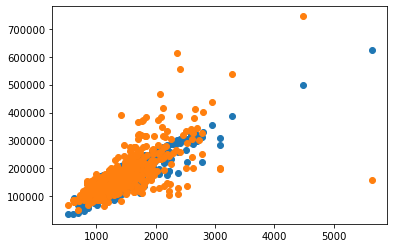

(1022, 2) (438, 2) (1022,) (438,)


In [320]:
# 
# 線形回帰
# 

# 問題１でndarrayに移したデータを分析・前処理を行う

# その後可視化（散布図）

# 説明変数と目的変数を学習用とテスト用に分割（７：３の割合）
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)



# 次に線形回帰による学習
from sklearn.linear_model import LinearRegression #線形回帰
model = LinearRegression() #インスタンスを定義
model.fit(x_train, t_train) #モデルの学習

model_co = model.coef_ #学習用データから学習した内容
model.intercept_ #バイアスB

# print(model_co.shape)
# 学習結果について
print('・・・・・1. 線形回帰・・・・・')
print(f'学習結果 train : score{model.score(x_train, t_train)}')
print(f'学習結果 test  : score{model.score(x_test, t_test)}')
print('過学習が起きている。学習用のデータの方が数値が高く、テスト用のデータの方が数値が低い')

# 推定（推論）
y = model.predict(x_test)
print(f'SalePriceの予測値 : {y[0]}') # 予測した値
print(f'SalePriceの目標値 : {t_test[0]}') #実際の値
x_test.shape
print(type(y))

# 評価
from sklearn.metrics import mean_squared_error

# 平均二乗誤差=実際の値と予測した値の、絶対値の2乗を平均したもの
mse = mean_squared_error(t_test, y) # 第一引数:実際の値,第二引数:予測した値（配列）
print(f'平均二乗誤差 : {mse}')

# xx = np.array(['GrLivArea','YearBuilt'])
# print(x)
# 横軸にある特徴量、縦軸に推測した住宅価格
# scatterを用いて、実際のデータと予測結果を比較できるグラフ
# 学習した内容を可視化するためグラフ化

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax2 = fig.add_subplot(1, 1, 1)

ax.scatter(x_test[:,0], y)
ax2.scatter(x_test[:,0], t_test)
# plt.scatter(,height=y)
plt.show()
print(x_train.shape, x_test.shape, t_train.shape, t_test.shape)

# 線形回帰のグラフがあまり上手くいかない

## 【問題3】手法の比較

以下のすべての手法について学習・推定・評価・可視化を行ってください。

そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。

どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。

公式ドキュメントへのリンクは以下です。

本来はパラメータチューニングを行いますが、まずはデフォルトの値で実行しましょう。

**1. 線形回帰** sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation

**2. SVM** sklearn.svm.SVR — scikit-learn 0.21.3 documentation

**3. 決定木** sklearn.tree.DecisionTreeRegressor — scikit-learn 0.21.3 documentation

**4. ランダムフォレスト** sklearn.ensemble.RandomForestRegressor — scikit-learn 0.21.3 documentation


SVM、決定木、ランダムフォレストは分類問題でも使用した手法ですが、

SVM回帰問題用のライブラリはそれぞれ専用のものに分かれています。

・・・・・2. SVM・・・・・
学習結果 train : score-0.04765923588886256
学習結果 test  : score-0.048642832206201136
SalePriceの予測値 : 163129.91703371092
SalePriceの目標値 : 200624


No handles with labels found to put in legend.


-0.048642832206201136


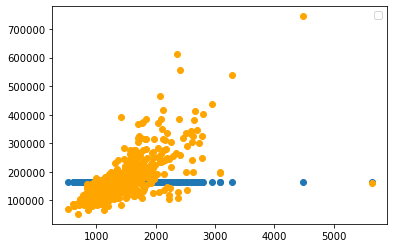

In [322]:
# 
# 2. SVM
# 

from sklearn.svm import SVR #SVM
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2)) #インスタンスを定義
regr.fit(x_train, t_train) #モデルの学習

# 学習結果について
print('・・・・・2. SVM・・・・・')
print(f'学習結果 train : score{regr.score(x_train, t_train)}')
print(f'学習結果 test  : score{regr.score(x_test, t_test)}')

# 推定（推論）
y2 = regr.predict(x_test)
print(f'SalePriceの予測値 : {y2[0]}') # 予測した値
print(f'SalePriceの目標値 : {t_test[0]}') #実際の値
x_test.shape

# 評価
from sklearn.metrics import mean_squared_error

score = regr.score(x_test, t_test)
print(score)

# 可視化
# ライブラリのインポート
plt.figure()
plt.scatter(x_test[:,0], y2)
plt.scatter(x_test[:,0], t_test, color="orange")
# plt.plot(x_test[:,0], y2, linewidth=2,color="orange")
plt.legend()
plt.show()



No handles with labels found to put in legend.


・・・・・3. 決定木・・・・・
学習結果 train : score0.9969097951903657
学習結果 test  : score0.6616238015381076
SalePriceの予測値 : 151400.0
SalePriceの目標値 : 200624
0.6616238015381076
交差検証の結果:[ 0.27945917  0.44471988 -0.03118113  0.53751534  0.46161664]


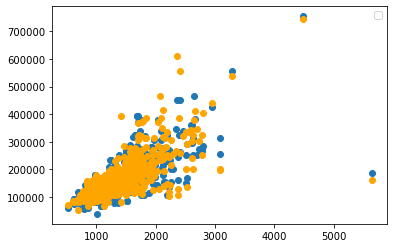

In [323]:
# 
# 3. 決定木
# 

# 必要なものをインポート
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0) #インスタンスを定義
regressor.fit(x_train, t_train) #モデルの学習

# 学習結果について
print('・・・・・3. 決定木・・・・・')
print(f'学習結果 train : score{regressor.score(x_train, t_train)}')
print(f'学習結果 test  : score{regressor.score(x_test, t_test)}')

# 推定（推論）
y3 = regressor.predict(x_test)
print(f'SalePriceの予測値 : {y3[0]}') # 予測した値
print(f'SalePriceの目標値 : {t_test[0]}') #実際の値
x_test.shape

# 評価
from sklearn.metrics import mean_squared_error

score = regressor.score(x_test, t_test)
print(score)

# 交差検証
cvs = cross_val_score(regressor, x_test, t_test)
print(f'交差検証の結果:{cvs}')

# 可視化
# ライブラリのインポート
plt.figure()
plt.scatter(x_test[:,0], y3)
plt.scatter(x_test[:,0], t_test, color="orange")
# plt.plot(x_test[:,0], y3, linewidth=2, color="orange")
plt.legend()
plt.show()

・・・・・4. ランダムフォレスト・・・・・
学習結果 train : score0.9548315368441844
学習結果 test  : score0.7409828610549811
SalePriceの予測値 : 196907.4
SalePriceの目標値 : 200624
0.7409828610549811


No handles with labels found to put in legend.


交差検証の結果:[0.56607541 0.6567994  0.28961782 0.6244482  0.69306683]


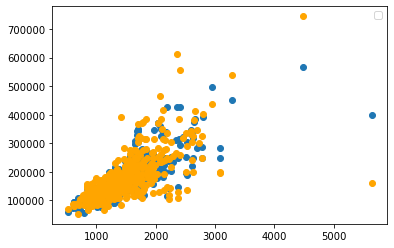

In [324]:
# 
# 4. ランダムフォレスト
# 

# 必要なものをインポート
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

# random_state=0はツリー構造を作るときに作成される結果をずれないように
random_regr = RandomForestRegressor(random_state=0) #インスタンスを定義
random_regr.fit(x_train, t_train) #モデルの学習

# 学習結果について
print('・・・・・4. ランダムフォレスト・・・・・')
print(f'学習結果 train : score{random_regr.score(x_train, t_train)}')
print(f'学習結果 test  : score{random_regr.score(x_test, t_test)}')

# 推定（推論）
y4 = random_regr.predict(x_test)
print(f'SalePriceの予測値 : {y4[0]}') # 予測した値
print(f'SalePriceの目標値 : {t_test[0]}') #実際の値
x_test.shape

# 評価
from sklearn.metrics import mean_squared_error

score = random_regr.score(x_test, t_test)
print(score)

# 交差検証
cvs = cross_val_score(random_regr, x_test, t_test)
print(f'交差検証の結果:{cvs}')

plt.figure()
plt.scatter(x_test[:,0], y4)
plt.scatter(x_test[:,0], t_test, color="orange")
# plt.plot(x_test[:,0], )
plt.legend()
plt.show()


In [325]:
# 全ての結果を表にまとめる
print(f'1. 線形回帰による[0]番目の予測値は{y[0]}')
print(f'2. RVMによる[0]番目の予測値は{y2[0]}')
print(f'3. 決定木による[0]番目の予測値は{y3[0]}')
print(f'4. ランダムフォレストによる[0]番目の予測値は{y4[0]}')
print('●-------------------------------------------------●')
print(f'実際の値は{t_test[0]}')
print(t_test[0:10])

# データフレームへ変換する上で現在yはnumpyのndarray型なのでDataFrame変換用の変数を作っておく
y_df = y
y2_df = y2
y3_df = y3
y4_df = y4

# それぞれをdfに変換して、縦方向の列に追加してゆく
y_df = pd.DataFrame(y_df, columns=["LinearRegression"])
y2_df = pd.DataFrame(y2_df, columns=["SVM"])
y3_df = pd.DataFrame(y3_df, columns=["DecisionTreeRegressor"])
y4_df = pd.DataFrame(y4_df, columns=["RandomForestRegressor"])

# 左右を結合してさらに結合
join_y12 = y_df.join(y2_df)
join_y34 = y3_df.join(y4_df)

# 結合完成
total_y = join_y12.join(join_y34)

# 4つのパターンで予測値をまとめてDataFrameへ
display(total_y)

# 結果考察
print('結果の考察')

print('決定木が一番数値から外れていた。ランダムフォレストが一番実際の値にちかい')
print('線形回帰やSVMでは過学習が起きているが決定木では起きていないように感じる')

1. 線形回帰による[0]番目の予測値は264308.2848253229
2. RVMによる[0]番目の予測値は163129.91703371092
3. 決定木による[0]番目の予測値は151400.0
4. ランダムフォレストによる[0]番目の予測値は196907.4
●-------------------------------------------------●
実際の値は200624
[200624 133000 110000 192000  88000  85000 282922 141000 745000 148800]


,LinearRegression,SVM,DecisionTreeRegressor,RandomForestRegressor
0,264308.284825,163129.917034,151400.0,196907.400000
1,155525.186028,162940.011161,117000.0,144674.000000
2,127717.354675,162850.986857,135000.0,127761.166667
3,236090.706936,163222.018270,144000.0,177510.000000
4,138209.364741,162909.794084,81500.0,95339.500000
...,...,...,...,...
433,147587.555382,162904.422740,164900.0,150472.000000
434,181793.244314,163028.416743,174000.0,161362.000000
435,263448.885668,163281.687743,205000.0,232244.900000
436,217319.774980,163254.634242,286000.0,235939.000000


結果の考察
決定木が一番数値から外れていた。ランダムフォレストが一番実際の値にちかい
線形回帰やSVMでは過学習が起きているが決定木では起きていないように感じる


In [ ]:

# 課題点
# 可視化のグラフ化で縦軸、横軸、散布図に何を入力する必要があるのか理解が薄い